In [27]:
#importing packages
import os
os.environ['USE_PYGEOS'] = '0'
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import fiona
from fiona import Feature, Geometry
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
import rasterio as rio
from rasterio.enums import Resampling

import skgstat as skg

# Load indices DataFrame from the CSV file
directory_path='S:/mc5545/SA_Drone_data/Indices_csv/'
df1_i = pd.read_csv(f'{directory_path}indices_2006_burnplot18.csv', index_col=0)
df2_i = pd.read_csv(f'{directory_path}indices_2016_burn2016.csv', index_col=0)
df3_i = pd.read_csv(f'{directory_path}indices_2017_burn2017.csv', index_col=0)
df4_i = pd.read_csv(f'{directory_path}indices_2019_burn2019.csv', index_col=0)
df5_i = pd.read_csv(f'{directory_path}indices_2020_burnplot17.csv', index_col=0)
df6_i = pd.read_csv(f'{directory_path}indices_2022_burn2022.csv', index_col=0)


# Load textures DataFrame from the CSV file
directory_path='S:/mc5545/SA_Drone_data/textures_csv/'
df1_t = pd.read_csv(f'{directory_path}textures_2006_burnplot18.csv', index_col=0)
df2_t = pd.read_csv(f'{directory_path}textures_2016_burn2016.csv', index_col=0)
df3_t = pd.read_csv(f'{directory_path}textures_2017_burn2017.csv', index_col=0)
df4_t = pd.read_csv(f'{directory_path}textures_2019_burn2019.csv', index_col=0)
df5_t = pd.read_csv(f'{directory_path}textures_2020_burnplot17.csv', index_col=0)
df6_t = pd.read_csv(f'{directory_path}textures_2022_burn2022.csv', index_col=0)

# Concatenate the indices and textures features into a new df along the columns (axis=1) 
df1 = pd.concat([df1_i, df1_t], axis=1)
df2 = pd.concat([df2_i, df2_t], axis=1)
df3 = pd.concat([df3_i, df3_t], axis=1)
df4 = pd.concat([df4_i, df4_t], axis=1)
df5 = pd.concat([df5_i, df5_t], axis=1)
df6 = pd.concat([df6_i, df6_t], axis=1)

dataframes = [df1, df2, df3, df4, df5, df6]

df1['Year'] = 2006
df2['Year'] = 2016
df3['Year'] = 2017
df4['Year'] = 2019
df5['Year'] = 2020
df6['Year'] = 2022

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Concatenate DataFrames
concatenated_df = pd.concat(dataframes)
# List of columns to drop
columns_to_drop = ['x', 'y']

# Drop the specified columns
X= concatenated_df.drop(columns=columns_to_drop)
# X= concatenated_df.drop(columns="x")
# X= concatenated_df.drop(columns="y")
# Extract features (X) and target variable (y)
X = X.drop("Year", axis=1)  # Assuming "year" is the column containing the target variable

y = concatenated_df["Year"]

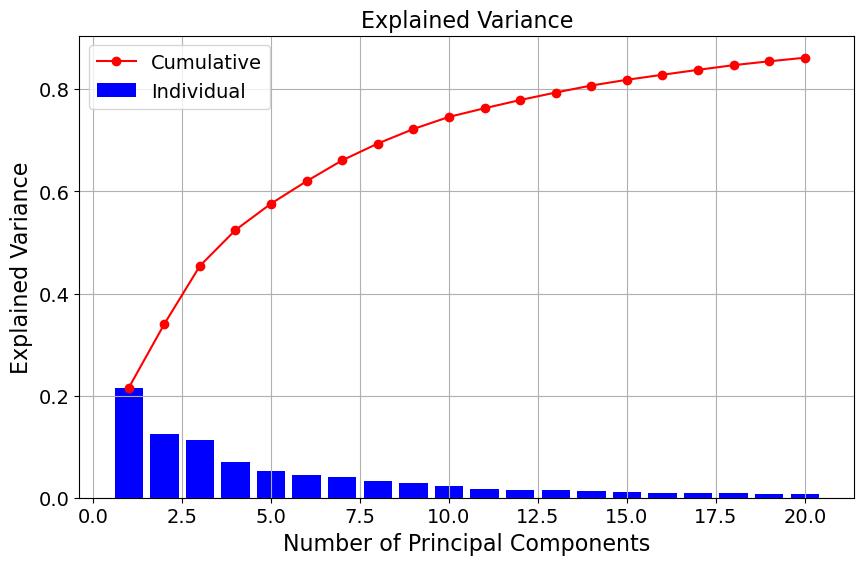

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
#pca = PCA()
num_components = 20  # Specify the number of components you want to keep
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

# Plot individual and cumulative explained variance using a bar chart
plt.figure(figsize=(10, 6))

# Bar chart for individual explained variance
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='b', label='Individual')
plt.title('Explained Variance', fontsize=16)
plt.xlabel('Number of Principal Components', fontsize=16)
plt.ylabel('Explained Variance', fontsize=16)
plt.grid(True)

# Cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 
         marker='o', linestyle='-', color='r', label='Cumulative')
plt.grid(True)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


Accuracy on the test set: 0.95


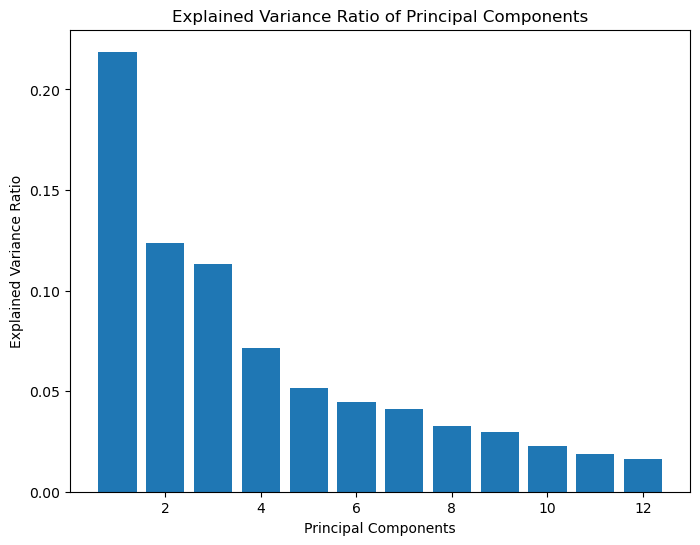

In [16]:
#PCA

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
num_components = 12  # Specify the number of components you want to keep
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can specify the kernel you want to use

# Train SVM classifier on the PCA-transformed features
svm_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_pca)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Plot the explained variance ratio to understand the importance of each component
plt.figure(figsize=(8, 6))
plt.bar(range(1, num_components + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()


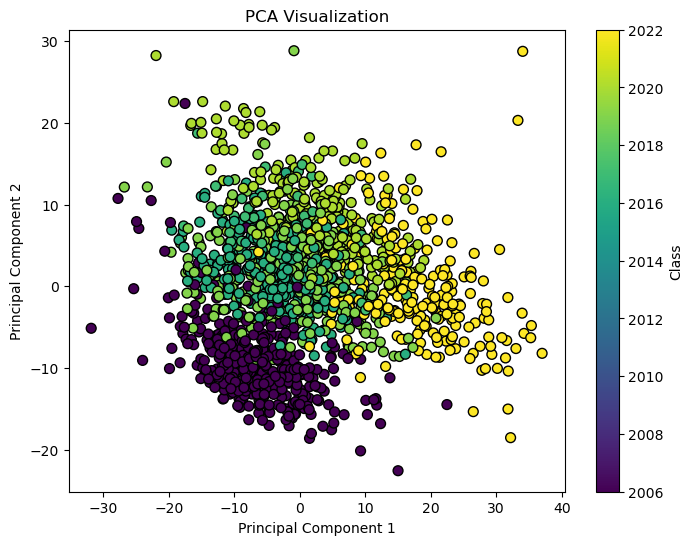

Accuracy on the test set: 0.66


In [3]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
num_components = 2  # Specify the number of components you want to keep
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=50)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can specify the kernel you want to use

# Train SVM classifier on the PCA-transformed features
svm_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_pca)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')




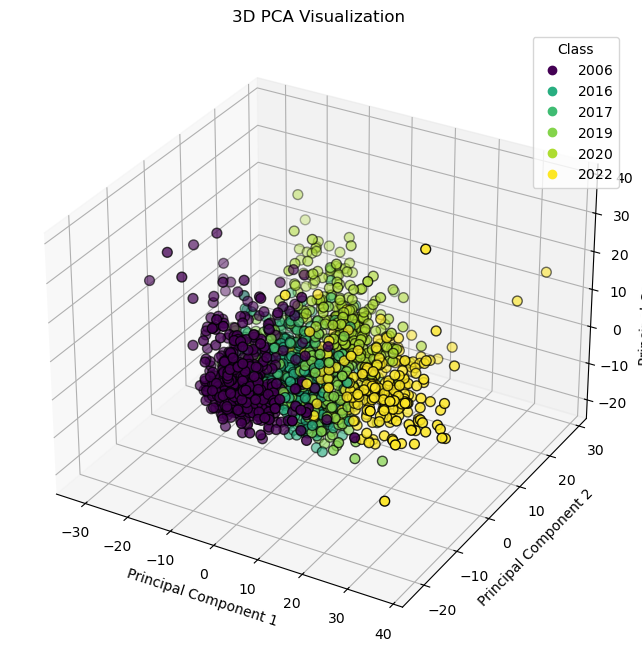

Accuracy on the test set: 0.72


In [6]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
num_components = 3  # Specify the number of components you want to keep
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create a 3D scatter plot of the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis', edgecolors='k', s=50)
ax.set_title('3D PCA Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Class')
plt.show()

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can specify the kernel you want to use

# Train SVM classifier on the PCA-transformed features
svm_classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_pca)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')


## ICA

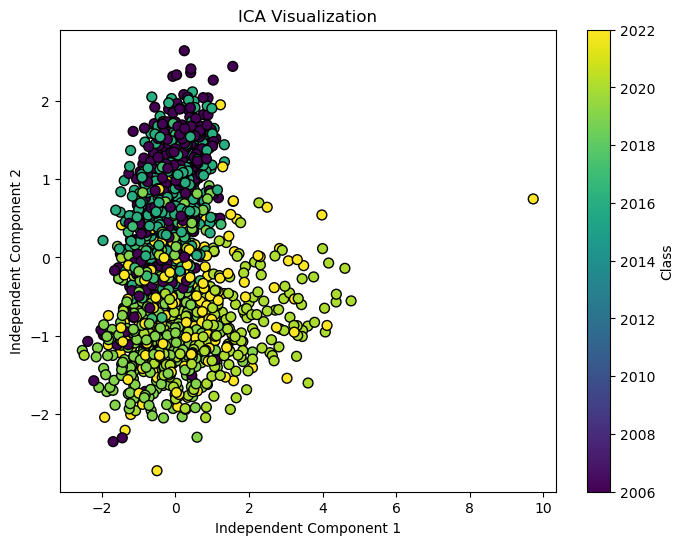

Accuracy on the test set: 0.95


In [5]:
from sklearn.decomposition import FastICA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ICA for dimensionality reduction
num_components = 12  # Specify the number of independent components you want to keep
ica = FastICA(n_components=num_components, random_state=42)
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)

# Create a scatter plot of the first two independent components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_ica[:, 0], X_train_ica[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=50)
plt.title('ICA Visualization')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.colorbar(label='Class')
plt.show()

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can specify the kernel you want to use

# Train SVM classifier on the ICA-transformed features
svm_classifier.fit(X_train_ica, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_ica)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')



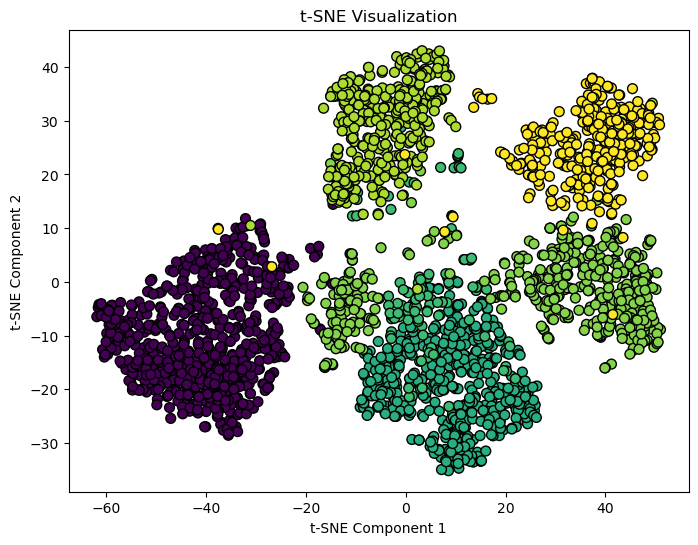

In [10]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have your data (X, y) loaded

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the data in 2D using a scatter plot
plt.figure(figsize=(8, 6))
#https://matplotlib.org/stable/users/explain/colors/colormaps.html
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='Paired', edgecolors='k', s=50) #viridis
plt.title('t-SNE Visualization',fontsize=18, fontweight='bold')
plt.xlabel('t-SNE Component 1',fontsize=16, fontweight='bold')
plt.ylabel('t-SNE Component 2',fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)  # Increase font size of x-axis tick labels
plt.yticks(fontsize=16)  # Increase font size of y-axis tick labels
plt.legend(*scatter.legend_elements(), title='Class',fontsize=14)

# Save the plot in a directory with 200 DPI resolution
plt.savefig('F:/2023 SA Fynbos Field Work/Study Area Fynbos/Burn Years.png', dpi=200)

plt.show()


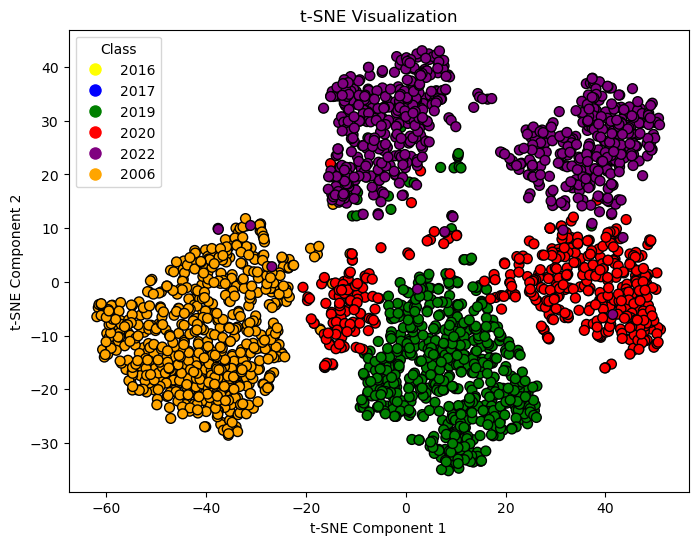

In [7]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming you have your data (X, y) loaded

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Define colors for each class
class_colors = {2016: 'yellow', 2017: 'blue', 2019: 'green', 2020: 'red', 2022: 'purple', 2006: 'orange'}

# Create a custom colormap with specified colors for each class
cmap = ListedColormap([class_colors[label] for label in y])

# Visualize the data in 2D using a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=cmap, edgecolors='k', s=50)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Create a legend with unique colors for each class
legend_labels = list(set(y))
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, 
                             markerfacecolor=class_colors[label], markersize=10) for label in legend_labels]
plt.legend(handles=legend_handles, title='Class')

plt.show()



In [4]:
list(set(y))

[2016, 2017, 2019, 2020, 2022, 2006]

In [18]:
# Print information about unique classes and sample distribution
unique_classes, class_counts = np.unique(y, return_counts=True)
print("Unique Classes:", unique_classes)
print("Sample Distribution in Each Class:", class_counts)


Unique Classes: [2006 2016 2017 2019 2020 2022]
Sample Distribution in Each Class: [644 480 106 460 358 324]


In [ ]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np


# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize the data in 2D using a scatter plot
plt.figure(figsize=(8, 6))
#https://matplotlib.org/stable/users/explain/colors/colormaps.html
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_resampled, cmap='Paired', edgecolors='k', s=50) #viridis
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(*scatter.legend_elements(), title='Class')
# Save the plot in a directory with 200 DPI resolution
#plt.savefig('F:/2023 SA Fynbos Field Work/Study Area Fynbos/Burn Years.png', dpi=200)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import numpy as np

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Apply standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


# Create an SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can specify the kernel you want to use

# Apply sequential forward feature selection from mlxtend to the SVM classifier
num_features_to_select = 10  # Specify the number of features you want to select
sfs_selector = SequentialFeatureSelector(svm_classifier, 
                                         k_features=num_features_to_select, 
                                         forward=True, floating=False, verbose=2, 
                                         scoring='accuracy', cv=5)
X_train_selected = sfs_selector.fit_transform(X_train_scaled, y_train_resampled)
X_test_selected = sfs_selector.transform(X_test_scaled)

# Train SVM classifier on the selected features
svm_classifier.fit(X_train_selected, y_train_resampled)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = np.array(sfs_selector.k_feature_idx_)
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)

# Plot the results on tranning set
fig1 = plot_sfs(sfs_selector.get_metric_dict(), kind='std_dev')
plt.ylim([0.5, 1])

plt.title('Sequential Forward Selection (SVM)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Features', fontsize=16, fontweight='bold')
plt.ylabel('Performance Metric', fontsize=16, fontweight='bold')
plt.grid()

# Make x and y ticks bold
plt.gca().tick_params(axis='x', which='both', labelsize=14, width=2)
plt.gca().tick_params(axis='y', which='both', labelsize=14, width=2)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [11]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your data (X, y) loaded
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply VarianceThreshold
var_threshold = 0.001  # You can adjust this threshold based on your requirements
variance_selector = VarianceThreshold(threshold=var_threshold)
X_train_selected = variance_selector.fit_transform(X_train_scaled)
X_test_selected = variance_selector.transform(X_test_scaled)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can specify the kernel you want to use

# Train SVM classifier on the selected features
svm_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = variance_selector.get_support()#np.where(variance_selector.get_support())[0]
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)


Accuracy on the test set: 0.97
Selected feature indices: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True 

## ALL filters

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif
#from sklearn.feature_selection import chi2 #doesnt not work; used for categorical features
from sklearn.feature_selection import f_regression
#from sklearn.feature_selection import SelectPercentile #doesnt work
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can specify the kernel you want to use

# Apply SelectKBest with f_classif to the SVM classifier
num_features_to_select = 10  # Specify the number of features you want to select
selector = SelectKBest(f_classif, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Train SVM classifier on the selected features
svm_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = np.where(selector.get_support())[0]
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)


Accuracy on the test set: 0.90
Selected feature indices: [  8  10  11  30 130 131 160 225 250 264]
Selected feature names: Index(['CV_Green', 'CV_RedEdge', 'CV_NIR', 'NDRE', 'CVI', 'Std_CVI', 'NormG',
       'sCCCI', 'M3Cl', 'CV_REP'],
      dtype='object')


### Feature Selection Techniques: Broadly categorized into three types: filter methods, wrapper methods, and embedded methods. 

## Grid search CV:Filter method

In [ ]:
#%% Grid search CV:Filter method 

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Define a range of k values to search over
k_values = [5, 10, 15, 20, 30, 50, 100]

# Create a pipeline with SelectKBest and SVM classifier
pipeline = Pipeline([
    ('selector', SelectKBest(f_classif)),
    ('classifier', SVC())
])

# Set up the parameter grid for GridSearchCV
param_grid = {
    'selector__k': k_values,
    'classifier__C': [0.1, 1, 10],  # You can adjust other SVM hyperparameters
    'classifier__gamma': ['scale', 'auto'],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']  # Include different kernel options
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # Adjust the number of folds as needed

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the performance on the test set using the best model from grid search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy on the test set with the best model: {accuracy_best}")

years = [2006, 2016, 2017, 2019, 2020, 2022]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Normalize the confusion matrix
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2', cmap='Blues', cbar=True, square=True,
            xticklabels=years, yticklabels=years, annot_kws={"size": 12})

plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Year')
plt.ylabel('True Year')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have X_train_scaled, X_test_scaled, y_train, and y_test
k_values = [5, 10, 15, 20, 30, 50, 100]

# Choose a specific value of k for which you want to visualize selected features
selected_k = 10

# Initialize SelectKBest with f_classif scoring and k features
selector = SelectKBest(f_classif, k=selected_k)

# Fit and transform the training data using the selected features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Plot a bar chart to visualize selected features
plt.bar(range(len(selected_feature_indices)), selector.scores_[selected_feature_indices], tick_label=selected_feature_indices)
plt.xlabel('Feature Index')
plt.ylabel('ANOVA F-statistic')
plt.title(f'Selected Features for k={selected_k}')
plt.show()

### Wrapper methods for feature selection involve using a specific machine learning model (such as SVM in your case) as part of the feature selection process. Common wrapper methods include Recursive Feature Elimination (RFE) and Forward/Backward Stepwise Selection. Here, I'll provide an example using RFE with an SVM classifier:

## RFE :Wrapper

In [ ]:

from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can specify the kernel you want to use

# Use RFE for feature selection
num_features_to_select = 10  # Specify the number of features you want to select
rfe_selector = RFE(svm_classifier, n_features_to_select=num_features_to_select)
X_train_selected = rfe_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = rfe_selector.transform(X_test_scaled)

# Train SVM classifier on the selected features
svm_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = np.where(rfe_selector.support_)[0]
print('Selected feature indices:', selected_feature_indices)
# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)

## RFE :Wrapper: Grid Search

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC()

# Use Forward Stepwise Selection for feature selection
num_features_to_select = 10  # Specify the number of features you want to select
#fss_selector = SequentialFeatureSelector(svm_classifier, n_features_to_select=num_features_to_select, direction='forward')

rfe_selector = RFE(svm_classifier, n_features_to_select=num_features_to_select)


# Set up the parameter grid for GridSearchCV
param_grid = {
    'selector__estimator__C': [0.1, 1, 10],  # SVM hyperparameters
    'selector__estimator__kernel': ['linear'],  # SVM kernel options
}

# Create a pipeline with Forward Stepwise Selection and SVM classifier
pipeline = Pipeline([
    #('selector', fss_selector),
    ('selector',rfe_selector),
    ('estimator', svm_classifier),
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # Adjust the number of folds as needed

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the performance on the test set using the best model from grid search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy on the test set with the best model: {accuracy_best}")

# Get the selected feature indices
selected_feature_indices = best_model.named_steps['selector'].get_support(indices=True)
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)

## Forward Stepwise Selection :Wrapper

In [ ]:
'''Forward Stepwise Selection is a wrapper method where features are added one at a 
time to the model until a certain criterion is met. In each step, the feature that 
provides the best improvement in the chosen criterion is added to the set of selected
features. Here's an example of using Forward Stepwise Selection for feature selection
with an SVM classifier:
'''
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can specify the kernel you want to use

# Use Forward Stepwise Selection for feature selection
num_features_to_select = 10  # Specify the number of features you want to select
fss_selector = SequentialFeatureSelector(svm_classifier, n_features_to_select=num_features_to_select, direction='forward')
X_train_selected = fss_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = fss_selector.transform(X_test_scaled)

# Train SVM classifier on the selected features
svm_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = fss_selector.get_support(indices=True)
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)

## Forward Stepwise Selection :Wrapper: Grid Search

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

# Assuming you have your data (X, y) loaded

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC()

# Use Forward Stepwise Selection for feature selection
num_features_to_select = 10  # Specify the number of features you want to select
fss_selector = SequentialFeatureSelector(svm_classifier, n_features_to_select=num_features_to_select, direction='forward')

# Set up the parameter grid for GridSearchCV
param_grid = {
    'selector__estimator__C': [0.1, 1, 10],  # SVM hyperparameters
    'selector__estimator__kernel': ['linear', 'rbf'],  # SVM kernel options
}

# Create a pipeline with Forward Stepwise Selection and SVM classifier
pipeline = Pipeline([
    ('selector', fss_selector),
    ('estimator', svm_classifier),
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # Adjust the number of folds as needed

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the performance on the test set using the best model from grid search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy on the test set with the best model: {accuracy_best}")

# Get the selected feature indices
selected_feature_indices = best_model.named_steps['selector'].get_support(indices=True)
print('Selected feature indices:', selected_feature_indices)

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)


In [ ]:
#%% RFE: logistic regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)

# Apply RFE to the logistic regression classifier
num_features_to_select = 10  # Specify the number of features you want to select
rfe_selector = RFE(logreg_classifier, n_features_to_select=num_features_to_select)
X_train_selected = rfe_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = rfe_selector.transform(X_test_scaled)


# Train logistic regression classifier on the selected features
logreg_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = np.where(rfe_selector.support_)[0]
print('Selected feature indices:', selected_feature_indices)
# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)

#for feature,k=5;accuracy=94%
#for feature,k=10;accuracy=96%
#for feature,k=15;accuracy=97%


In [4]:
#%% Forward: logistic regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)

# Apply RFE to the logistic regression classifier
num_features_to_select = 15  # Specify the number of features you want to select


# # Use Forward Stepwise Selection for feature selection
fss_selector = SequentialFeatureSelector(logreg_classifier, n_features_to_select=num_features_to_select, direction='forward')
X_train_selected = fss_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = fss_selector.transform(X_test_scaled)

# Train logistic regression classifier on the selected features
logreg_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test_selected)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')

# Get the selected feature indices
selected_feature_indices = np.where(fss_selector.support_)[0]
print('Selected feature indices:', selected_feature_indices)
# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]  # Assuming X is a DataFrame
print('Selected feature names:', selected_feature_names)

#for feature,k=5;accuracy=92%
#for feature,k=10;accuracy=97%
#for feature,k=15;accuracy=97%


Accuracy on the test set: 0.97
Selected feature indices: [ 34  39  45 121 130 248 250 269 272 333 357 407 413 498 499]
Selected feature names: Index(['CV_NDRE', 'CV_GNDVI', 'GCI', 'Std_BAI', 'CVI', 'kurtosis_PSRI', 'M3Cl',
       'CV_RENDVI', 'skewness_TCARI', 'mean_CV_band4',
       'variance_kurtosis_band4', 'dissimilarity_std_band2',
       'homogeneity_CV_band4', 'correlation_mean_band1',
       'correlation_mean_band2'],
      dtype='object')
